# Importing libraries and modules

In [1]:
import epidemic
import centrality
import score
import networkx as nx
import matplotlib.pyplot as plt

# Setting parameters

In [2]:
network = nx.barabasi_albert_graph(3000, 4) # Network
beta = 0.3 # Infection rate
initial_infected_count = 1 # Number of initial infected nodes
max_iterations = None # Stop simulation after this number of time steps (if None, ignore)
max_infected_frac = 0.2 # Stop simulation when this fraction of nodes is infected
observation_prob = 0.9 # Probability of observing an infected node

# Running epidemic and getting infected nodes

In [3]:
infected = epidemic.si_epidemic(network, beta, initial_infected_count, max_iterations, max_infected_frac)

# Defining observed infected nodes

In [4]:
observed = epidemic.observed_infected(infected, observation_prob)

# Computing network centrality measures

In [5]:
obs_betw = centrality.observed_betweenness(network, observed)
contact = centrality.contact(network, observed)
degree = centrality.degree(network)

# Computing AUC scores for each centrality measure

In [6]:
strategies = {"observed betweenness": obs_betw, "contact": contact, "degree": degree}
score_strategies = {f'{key}': score.auc_score(infected, strategy, observed) for key, strategy in strategies.items()}

for strategy in score_strategies:
    print('AUC for '+strategy+': '+str(score_strategies[strategy]['auc']))

AUC for observed betweenness: 0.7090516169154228
AUC for contact: 0.5880752487562187
AUC for degree: 0.6790982587064676


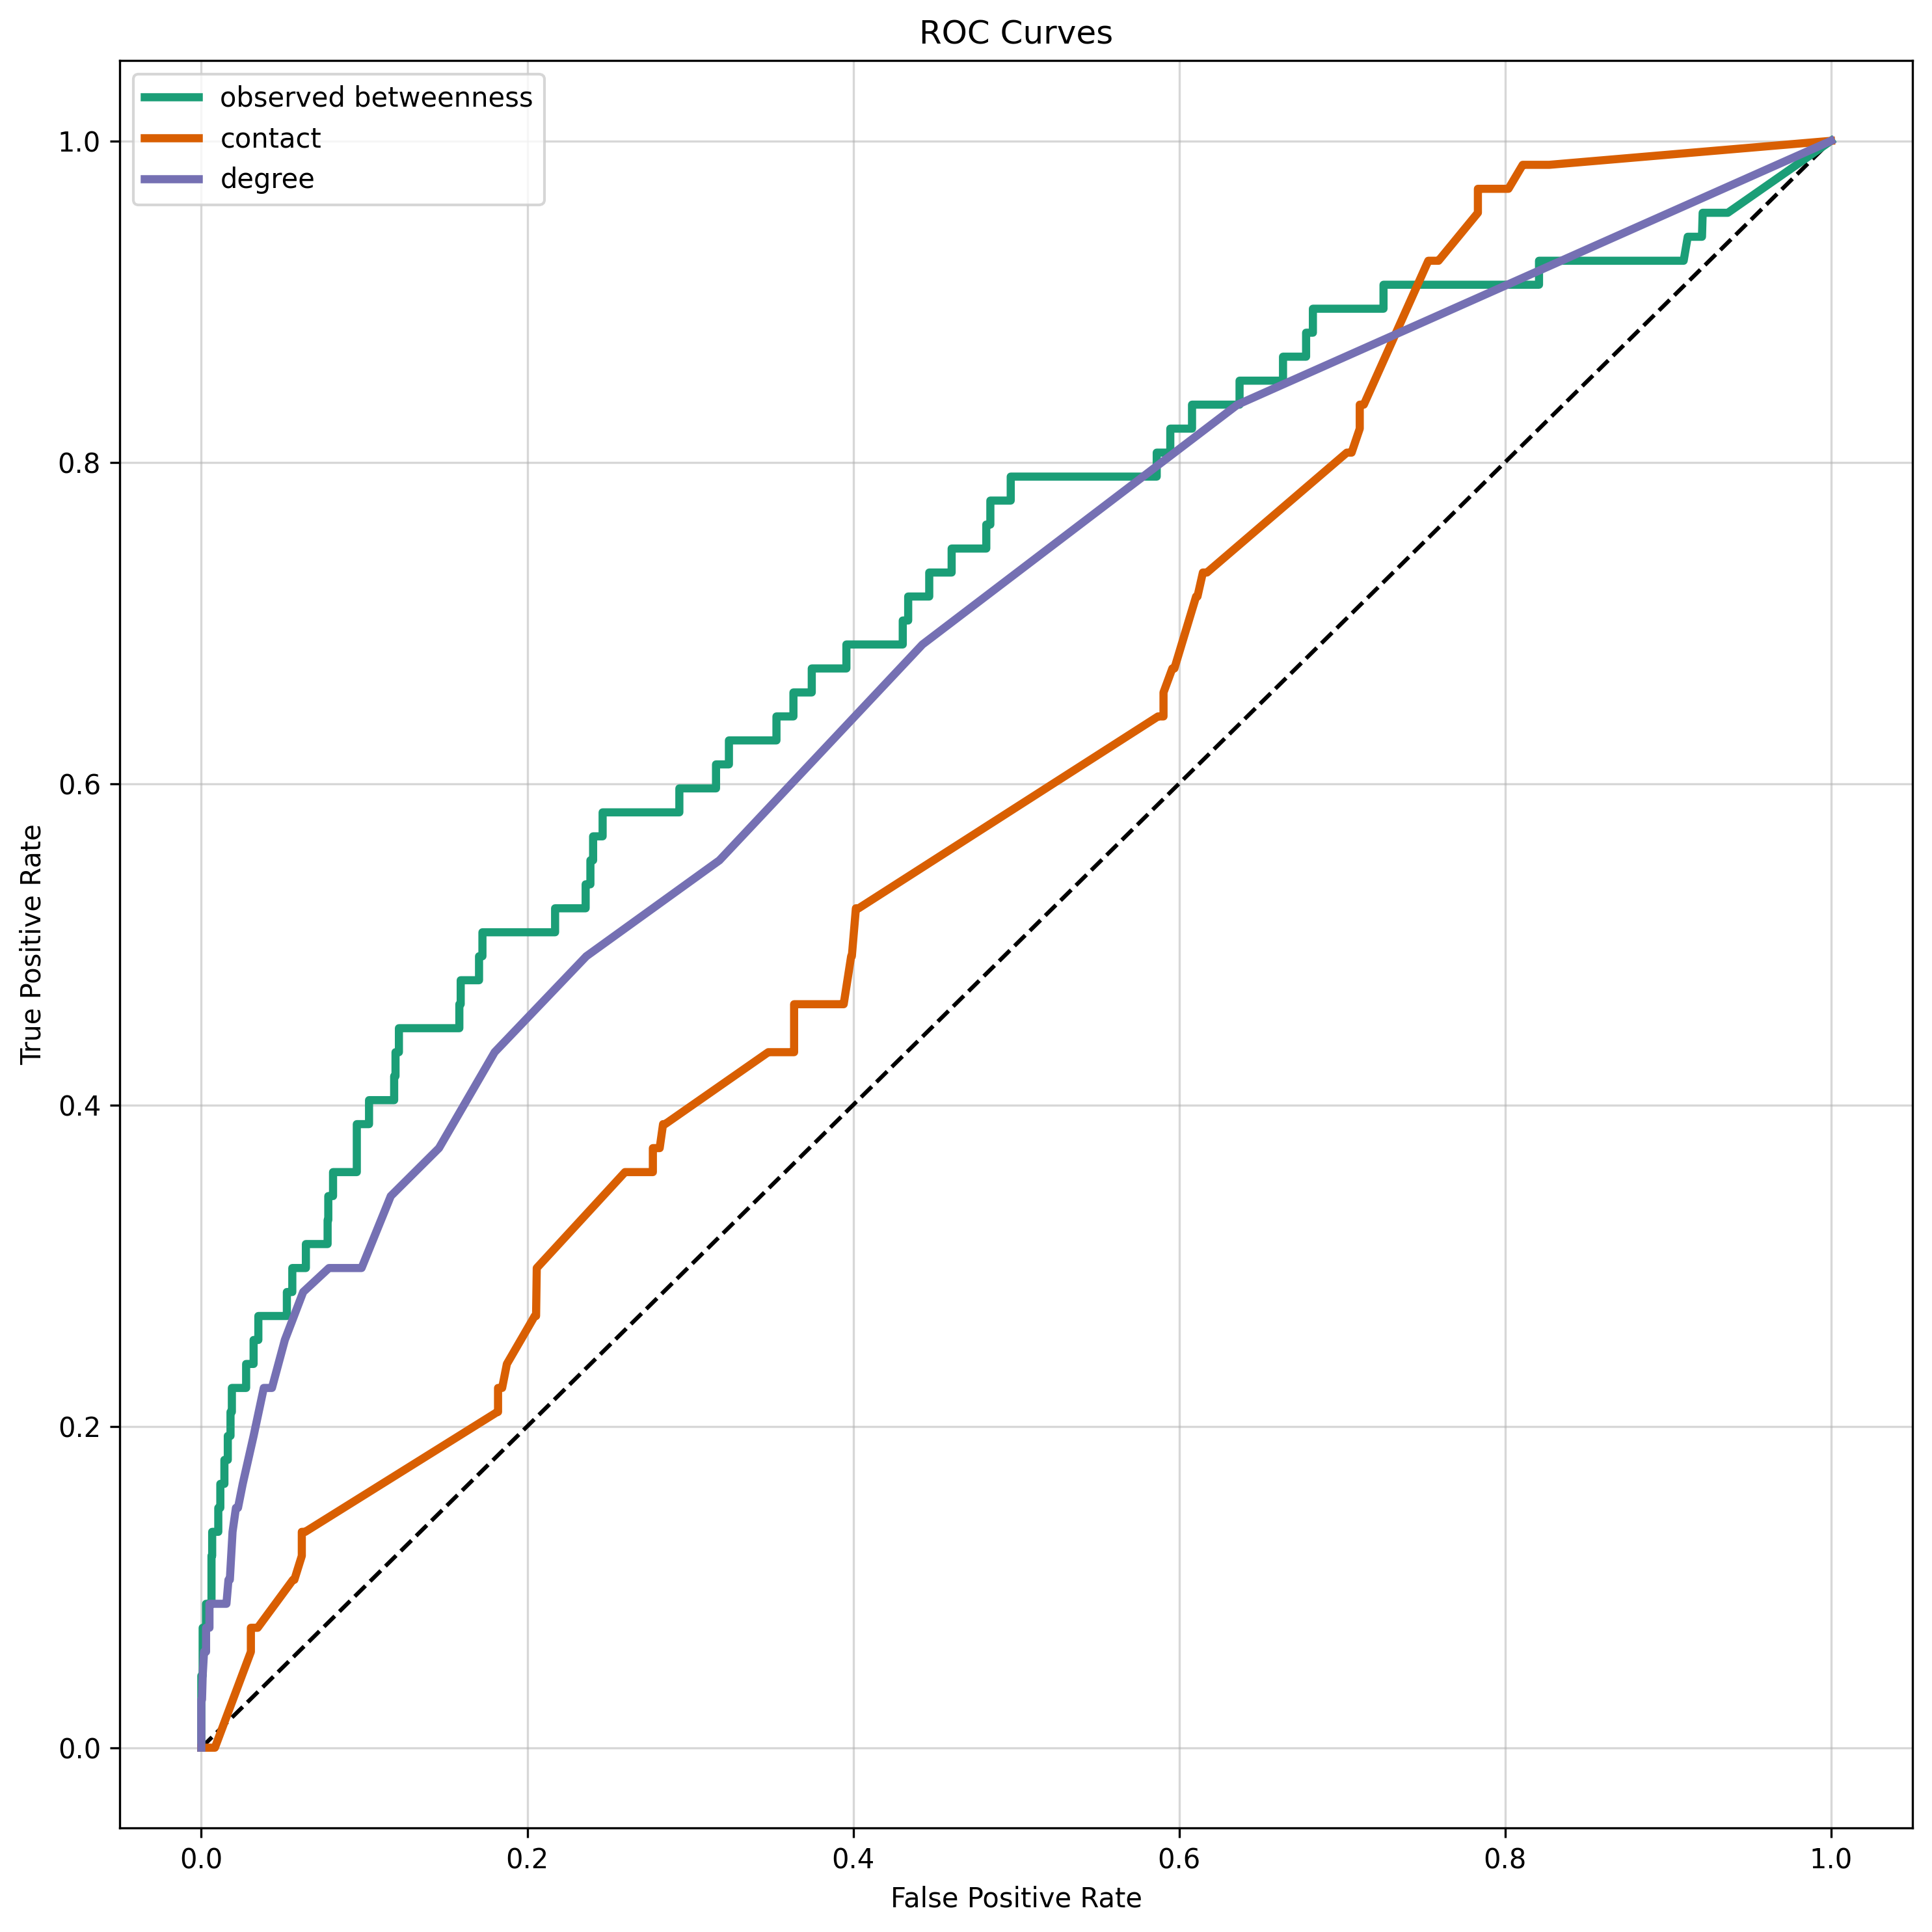

In [7]:
fig = plt.figure(figsize=(10,10), dpi=300)
cmap = plt.get_cmap("Dark2")

plt.plot([0,1], [0,1], 'k--')
for idx, strategy in enumerate(score_strategies):
    plt.plot(score_strategies[strategy]['roc'][0], score_strategies[strategy]['roc'][1], color=cmap(idx), label=strategy, linewidth=3)
plt.grid(alpha=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend(loc="best")
plt.tight_layout()
plt.show()